In [1]:
!wget https://raw.githubusercontent.com/Keep-Passion/SESF-Fuse/master/data/multi_focus/color_dsift_flower_2.png

--2019-09-18 04:52:19--  https://raw.githubusercontent.com/Keep-Passion/SESF-Fuse/master/data/multi_focus/color_dsift_flower_2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550668 (538K) [image/png]
Saving to: ‘color_dsift_flower_2.png’

color_dsift_flower_ 100%[===================>] 537.76K  --.-KB/s    in 0.05s   

2019-09-18 04:52:20 (10.0 MB/s) - ‘color_dsift_flower_2.png’ saved [550668/550668]



In [51]:
!wget https://raw.githubusercontent.com/Keep-Passion/SESF-Fuse/master/data/multi_focus/color_lytro_01_1.png
!wget https://raw.githubusercontent.com/Keep-Passion/SESF-Fuse/master/data/multi_focus/color_lytro_01_2.png

--2019-09-18 05:47:46--  https://raw.githubusercontent.com/Keep-Passion/SESF-Fuse/master/data/multi_focus/color_lytro_01_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327218 (320K) [image/png]
Saving to: ‘color_lytro_01_1.png’

color_lytro_01_1.pn 100%[===================>] 319.55K  --.-KB/s    in 0.04s   

2019-09-18 05:47:46 (7.68 MB/s) - ‘color_lytro_01_1.png’ saved [327218/327218]

--2019-09-18 05:47:48--  https://raw.githubusercontent.com/Keep-Passion/SESF-Fuse/master/data/multi_focus/color_lytro_01_2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting r

In [2]:
!wget https://raw.githubusercontent.com/Keep-Passion/SESF-Fuse/master/data/multi_focus/color_dsift_flower_1.png

--2019-09-18 04:52:44--  https://raw.githubusercontent.com/Keep-Passion/SESF-Fuse/master/data/multi_focus/color_dsift_flower_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 475336 (464K) [image/png]
Saving to: ‘color_dsift_flower_1.png’

color_dsift_flower_ 100%[===================>] 464.20K  --.-KB/s    in 0.05s   

2019-09-18 04:52:44 (8.65 MB/s) - ‘color_dsift_flower_1.png’ saved [475336/475336]



In [0]:
import cv2
I1 = cv2.imread('/content/color_lytro_01_1.png')
I2 =cv2.imread('/content/color_lytro_01_2.png')

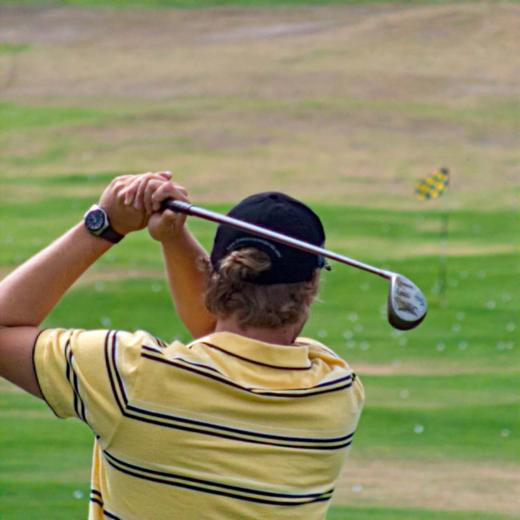

In [53]:
from google.colab.patches import cv2_imshow
cv2_imshow(I1)

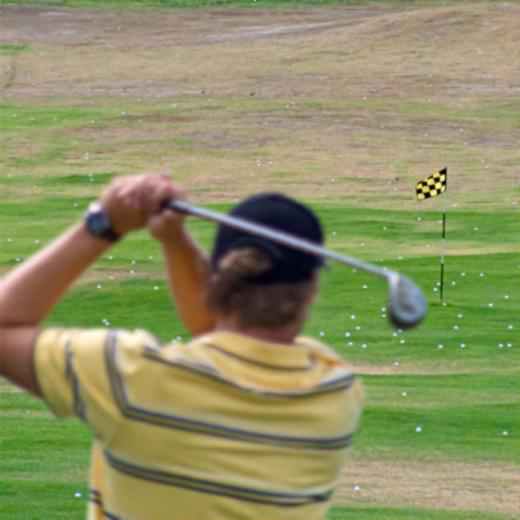

In [54]:
from google.colab.patches import cv2_imshow
cv2_imshow(I2)

In [0]:
I1x = cv2.Sobel(I1,cv2.CV_64F,1,0,ksize=5) 
I1y = cv2.Sobel(I1,cv2.CV_64F,0,1,ksize=5) 

In [0]:
I2x = cv2.Sobel(I2,cv2.CV_64F,1,0,ksize=5) 
I2y = cv2.Sobel(I2,cv2.CV_64F,0,1,ksize=5) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


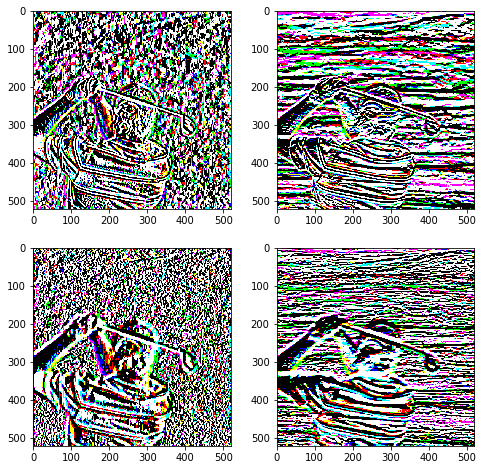

In [57]:
import numpy as np
import matplotlib.pyplot as plt
w=8
h=8
fig=plt.figure(figsize=(8,8))
columns = 2
rows = 2
img = np.random.randint(10, size=(h,w))
fig.add_subplot(rows, columns, 1)
plt.imshow(I1x)
img = np.random.randint(10, size=(h,w))
fig.add_subplot(rows, columns, 2)
plt.imshow(I1y)

img = np.random.randint(10, size=(h,w))
fig.add_subplot(rows, columns, 3)
plt.imshow(I2x)

img = np.random.randint(10, size=(h,w))
fig.add_subplot(rows, columns, 4)
plt.imshow(I2y)



plt.show()

In [0]:
S1 = np.sqrt(I1x*I1x + I1y*I1y)

In [0]:
S2 =np.sqrt(I2x*I2x + I2y*I2y)

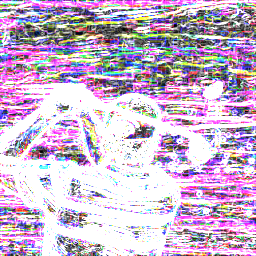

In [60]:
DS1 = cv2.resize(S1,(256,256))
cv2_imshow(DS1)

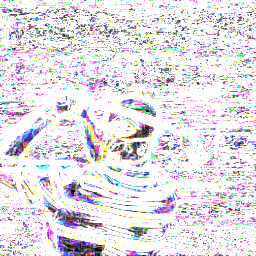

In [61]:
DS2 = cv2.resize(S2,(256,256))
cv2_imshow(DS2)

In [0]:
#passing to low pass filter 
S1F=cv2.GaussianBlur(S1,(5,5),0)
S2F=cv2.GaussianBlur(S2,(5,5),0)

In [0]:
P1 = S1F>S2F

In [0]:
P2 = S2F>S1F

In [0]:
F = P1*I1+P2*I2

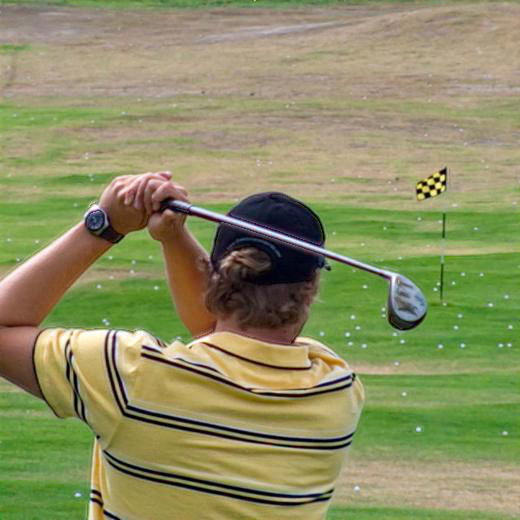

In [66]:
cv2_imshow(F)